# Brazilian Federal Police Corruption Related Iquiries 

This data was obtained in collaboration with the Brazilian Jurimetric Association.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.stats import norm
import math


# Setting the Dataframe
1- Load Dataset  

2- Correct the dates 

In [2]:
df = pd.read_csv('C:/Users/lucas/OneDrive/Desktop/Thesis/Empirics/test2.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
#Debuging excel data format to python for the colums "dt_instauracao"#

s = df['dt_instauracao']
s_int = s.astype(int)
# Correcting Excel Leap Year bug.
days = pd.to_timedelta(np.where(s_int > 59, s_int - 1, s_int), unit='D')
secs = pd.to_timedelta(
    ((s - s_int) * 86400.0).round().astype(int), unit='s')
pd.to_datetime('1899/12/31') + days + secs
df['date']= pd.to_datetime('1899/12/31') + days + secs


In [4]:
#Debuging excel data format to python for the colums "dt_relatorio"#
s = df['dt_relatorio']
s_int = s.astype(int)
# Correcting Excel Leap Year bug.
days = pd.to_timedelta(np.where(s_int > 59, s_int - 1, s_int), unit='D')
secs = pd.to_timedelta(
    ((s - s_int) * 86400.0).round().astype(int), unit='s')
pd.to_datetime('1899/12/31') + days + secs
df['date_final']= pd.to_datetime('1899/12/31') + days + secs

In [5]:

# Creating the variables 'year', 'month', 'period'#
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['period'] = df[['year','month']].apply(lambda x : '{}-{}'.format(x[0],x[1]), axis=1)
df['obs']=1

In [6]:
type(df['year'])

pandas.core.series.Series

# Setting Date of Beginning as Index

In this setting, we can analyse the real observed number of Police Inquiries already finalized that started on the day of the Index.

In [7]:
# ploting the data#
#seting the format month-year as the main one#

df = df.set_index('date')
df

,id_ipl,ano_ipl,unidade_ipl,uf_ipl,delegacia_tramitacao,dt_instauracao,dt_relatorio,duracao_em_dias,dt_fato,cd_lei,...,de_artigo_letra3,municipio_crime,uf_crime,sg_orgao_vitima,nm_orgao_vitima,date_final,year,month,period,obs
date,,,,,,,,,,,,,,,,,,,,,
2000-04-26,6.200045e+08,2000,DPF/CHI/RS,RS,DPF/CHI/RS,36642,41360,4718,NaN,127,...,NaN,Chu¡,RS,UNIAO FEDERAL,UNIAO FEDERAL,2013-03-27,2000,4,2000-4,1
2000-08-10,6.182000e+10,2000,SR/PF/PE,PE,DELEFAZ,36748,40217,3469,NaN,127,...,NaN,Recife,PE,UFPE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,2010-02-08,2000,8,2000-8,1
2000-09-04,3.962000e+10,2000,SR/PF/MT,MT,DRE,36773,40973,4200,NaN,127,...,NaN,Cuiab,MT,UNIÇO,UniÆo,2012-03-05,2000,9,2000-9,1
2001-05-17,1.572001e+10,2001,SR/PF/MS,MS,SR/PF/MS,37028,40812,3784,NaN,127,...,NaN,Eldorado,MS,UNIÇO,Sociedade,2011-09-26,2001,5,2001-5,1
2001-07-23,2.422001e+10,2001,SR/PF/MS,MS,SR/PF/MS,37095,40771,3676,NaN,127,...,NaN,Campo Grande,MS,UNIÇO,UNIÇO,2011-08-16,2001,7,2001-7,1
2001-08-14,4.422001e+10,2001,SR/PF/AM,AM,DELEFAZ,37117,40197,3080,NaN,127,...,NaN,Manaus,AM,UNIÇO,Sistema Financeiro Nacional,2010-01-19,2001,8,2001-8,1
2001-08-17,4.542001e+10,2001,SR/PF/AM,AM,DELEFAZ,37120,41241,4121,NaN,127,...,NaN,Manaus,AM,UNIÇO,UNIÇO,2012-11-28,2001,8,2001-8,1
2001-08-20,4.592001e+10,2001,SR/PF/AM,AM,DELEFAZ,37123,41145,4022,NaN,62,...,NaN,Manaus,AM,UNIÇO,Liberdade Individual,2012-08-24,2001,8,2001-8,1
2001-11-05,7.292001e+10,2001,SR/PF/AM,AM,DELEFAZ,37200,40303,3103,NaN,62,...,NaN,Manaus,AM,UNIÇO,UNIÇO,2010-05-05,2001,11,2001-11,1


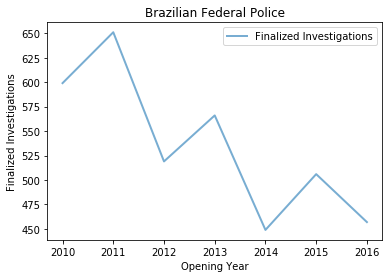

In [20]:

est1 = df['2010':'2016'].resample('Y').obs.count()

est1.plot(linewidth=2, label='Finalized Investigations' , alpha=0.6 )

plt.xlabel('Opening Year')
plt.ylabel('Finalized Investigations')

plt.title("Brazilian Federal Police")

plt.legend()

plt.show()


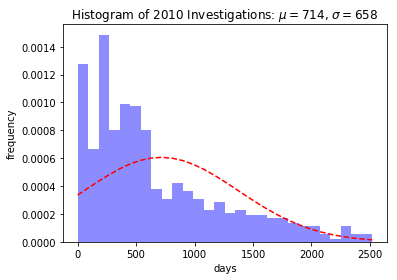

None


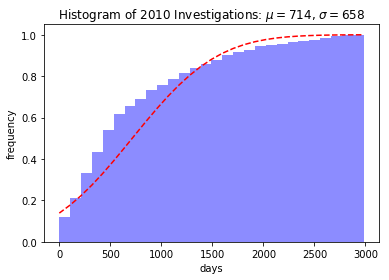

None
[1.27692014e-03 6.67047837e-04 1.48656375e-03 8.00457404e-04
 9.91042500e-04 9.71983991e-04 8.00457404e-04 3.81170192e-04
 3.04936154e-04 4.19287212e-04 3.62111683e-04 3.04936154e-04
 2.28702115e-04 2.85877644e-04 2.09643606e-04 2.28702115e-04
 1.90585096e-04 1.90585096e-04 1.71526587e-04 1.71526587e-04
 1.33409567e-04 1.14351058e-04 1.14351058e-04 5.71755289e-05
 1.90585096e-05 1.14351058e-04 5.71755289e-05 5.71755289e-05]
[0.11853088 0.21368948 0.33222037 0.43572621 0.5375626  0.61769616
 0.65609349 0.69115192 0.73288815 0.75792988 0.78797997 0.81469115
 0.83973289 0.85976628 0.87979967 0.89983306 0.91652755 0.92821369
 0.94323873 0.95158598 0.95325543 0.96327212 0.96828047 0.97662771
 0.98330551 0.99165275 0.9966611  1.        ]


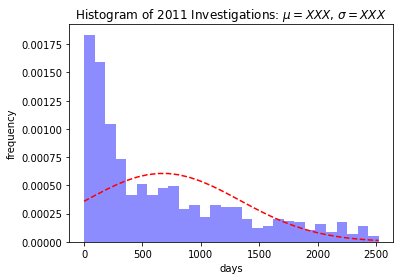

None


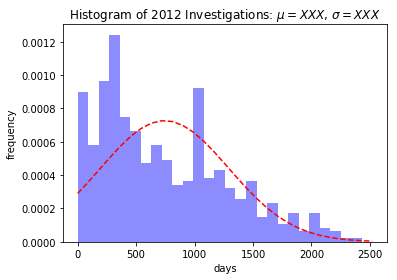

None


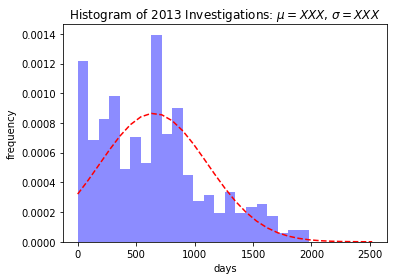

None


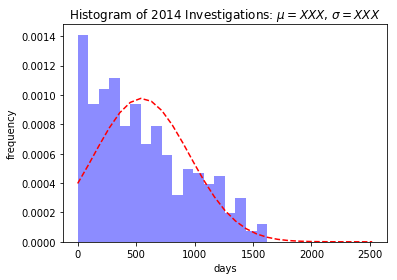

None


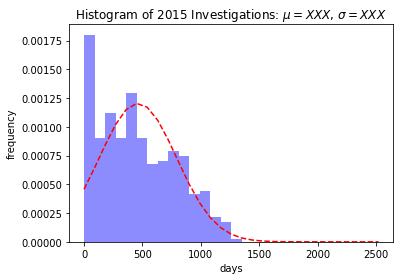

None


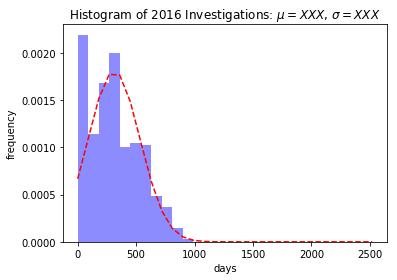

None


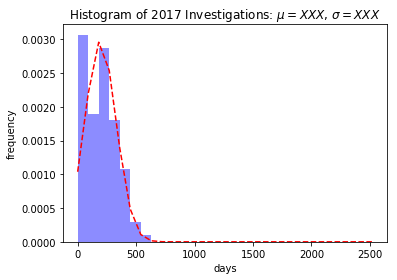

None


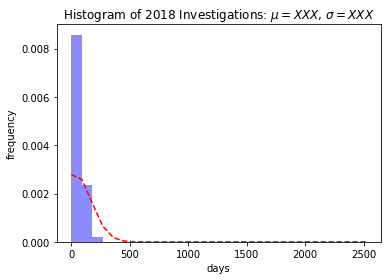

None


In [10]:
# the histogram of the data od 2010#
den2010, bins, patches = plt.hist(df['2010'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2010'].duracao_em_dias.mean(), df['2010'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2010 Investigations: $\mu=714$, $\sigma=658$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())

cum1, bins, patches = plt.hist(df['2010'].duracao_em_dias, 28, density=1, facecolor='blue', alpha=0.45, cumulative=True)

y = norm.cdf(bins, df['2010'].duracao_em_dias.mean(),df['2010'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2010 Investigations: $\mu=714$, $\sigma=658$')

print(plt.show())
print(den2010)
print(cum1)


# the histogram of the data od 2010#
den2011, bins, patches = plt.hist(df['2011'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2011'].duracao_em_dias.mean(), df['2011'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2011 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())



# the histogram of the data od 2010#
den2012, bins, patches = plt.hist(df['2012'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2012'].duracao_em_dias.mean(), df['2012'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2012 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())

# the histogram of the data od 2010#
den2013, bins, patches = plt.hist(df['2013'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2013'].duracao_em_dias.mean(), df['2013'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2013 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())

# the histogram of the data od 2010#
den2014, bins, patches = plt.hist(df['2014'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2014'].duracao_em_dias.mean(), df['2014'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2014 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())

# the histogram of the data od 2010#
den2015, bins, patches = plt.hist(df['2015'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2015'].duracao_em_dias.mean(), df['2015'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2015 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())
# the histogram of the data od 2010#
den2016, bins, patches = plt.hist(df['2016'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2016'].duracao_em_dias.mean(), df['2016'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2016 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())

# the histogram of the data od 2010#
den2017, bins, patches = plt.hist(df['2017'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2017'].duracao_em_dias.mean(), df['2017'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2017 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())

# the histogram of the data od 2010#
den2018, bins, patches = plt.hist(df['2018'].duracao_em_dias, 28, density=100, facecolor='blue', alpha=0.45, range=(0,2520))

# add a normal 'best fit' line over empirical distribution of 2010#
y = norm.pdf(bins, df['2018'].duracao_em_dias.mean(), df['2018'].duracao_em_dias.std())
plt.plot(bins, y, 'r--')
plt.xlabel('days')
plt.ylabel('frequency')
plt.title(r'Histogram of 2018 Investigations: $\mu=XXX$, $\sigma=XXX$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
print(plt.show())




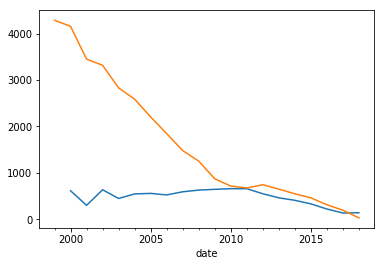

In [11]:
df['1999':'2018'].resample('Y').duracao_em_dias.std().plot()
df['1999':'2018'].resample('Y').duracao_em_dias.mean().plot()

<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[   0.   90.  180.  270.  360.  450.  540.  630.  720.  810.  900.  990.
 1080. 1170. 1260. 1350. 1440. 1530. 1620. 1710. 1800. 1890. 1980. 2070.
 2160. 2250. 2340. 2430. 2520.] [1.27692014e-03 6.67047837e-04 1.48656375e-03 8.00457404e-04
 9.91042500e-04 9.71983991e-04 8.00457404e-04 3.81170192e-04
 3.04936154e-04 4.19287212e-04 3.62111683e-04 3.04936154e-04
 2.28702115e-04 2.85877644e-04 2.09643606e-04 2.28702115e-04
 1.90585096e-04 1.90585096e-04 1.71526587e-04 1.71526587e-04
 1.33409567e-04 1.14351058e-04 1.14351058e-04 5.71755289e-05
 1.90585096e-05 1.14351058e-04 5.71755289e-05 5.71755289e-05]
[0.00127692 0.00194397 0.00343053 0.00423099 0.00522203 0.00619402
 0.00699447 0.00737564 0.00768058 0.00809987 0.00846198 0.00876691
 0.00899562 0.00928149 0.00949114 0.00971984 0.00991043 0.01010101
 0.01027254 0.01044406 0.01057747 0.01069182 0.01080617 0.01086335
 0.01088241 0.01099676 0.01105394 0.011111

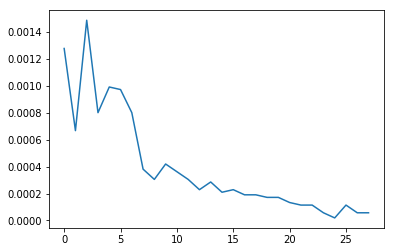

In [12]:



#confirming matplotlib with numpy results#
x = np.array(df['2010'].duracao_em_dias)
freq_2010, bin_edges = np.histogram(x, bins, density=True) #need the bins series with bins edges being quarterly)

cum_2010 = freq_2010.cumsum()
print(type(freq_2010[0]))
print(type(freq_2010))
print(type(est1))

print(bin_edges, freq_2010)
print(cum_2010)

plt.plot(freq_2010)

In [13]:
print(den2010,den2012)

[1.27692014e-03 6.67047837e-04 1.48656375e-03 8.00457404e-04
 9.91042500e-04 9.71983991e-04 8.00457404e-04 3.81170192e-04
 3.04936154e-04 4.19287212e-04 3.62111683e-04 3.04936154e-04
 2.28702115e-04 2.85877644e-04 2.09643606e-04 2.28702115e-04
 1.90585096e-04 1.90585096e-04 1.71526587e-04 1.71526587e-04
 1.33409567e-04 1.14351058e-04 1.14351058e-04 5.71755289e-05
 1.90585096e-05 1.14351058e-04 5.71755289e-05 5.71755289e-05] [8.99165061e-04 5.78034682e-04 9.63391137e-04 1.24170413e-03
 7.49304218e-04 6.63669450e-04 4.70991222e-04 5.78034682e-04
 4.92399914e-04 3.42539071e-04 3.63947763e-04 9.20573753e-04
 3.85356455e-04 4.28173839e-04 3.21130379e-04 2.56904303e-04
 3.63947763e-04 1.49860844e-04 2.35495611e-04 1.07043460e-04
 1.71269535e-04 6.42260758e-05 1.71269535e-04 8.56347677e-05
 6.42260758e-05 2.14086919e-05 2.14086919e-05 0.00000000e+00]


In [14]:
#saame thing as bellow
#mylist=[]
#for x in range(1,25):
#    y=(den2010[(x-1):x]/den2010[0:1])
#    mylist.append(y)

In [15]:

#Building the array with the correction values over Q1 using for loop

#saame thing as bellow
#mylist=[]
#for x in range(1,25):
#    y=(den2010[(x-1):x]/den2010[0:1])
#    mylist.append(y)

mylist = [den2010[(x-1):x]/den2010[0:1] for x in range(1,25)]
correc = np.asarray(mylist)
correc


array([[1.        ],
       [0.52238806],
       [1.1641791 ],
       [0.62686567],
       [0.7761194 ],
       [0.76119403],
       [0.62686567],
       [0.29850746],
       [0.23880597],
       [0.32835821],
       [0.28358209],
       [0.23880597],
       [0.17910448],
       [0.2238806 ],
       [0.1641791 ],
       [0.17910448],
       [0.14925373],
       [0.14925373],
       [0.13432836],
       [0.13432836],
       [0.10447761],
       [0.08955224],
       [0.08955224],
       [0.04477612]])

In [16]:
#Generating the coorected Anual and Quarterly Series from 2012 onwards


#the uncorrected
#unc2011=df['2012'].obs.count(if duracao_em_dias<91)
#print(unc2011)

#redo! loop all this mess!!



y_2012 = df['year'] == 2012
x_2012 = df.duracao_em_dias < 90
print(df[y_2012 & x_2012].duracao_em_dias.count())



y_2013 = df['year'] == 2013
x_2013 = df.duracao_em_dias < 90
print(df[y_2013 & x_2013].duracao_em_dias.count())


y_2014 = df['year'] == 2014
x_2014 = df.duracao_em_dias < 90
print(df[y_2014 & x_2014].duracao_em_dias.count())


y_2015 = df['year'] == 2015
x_2015 = df.duracao_em_dias < 90
print(df[y_2015 & x_2015].duracao_em_dias.count())


y_2016 = df['year'] == 2016
x_2016 = df.duracao_em_dias < 90
print(df[y_2016 & x_2016].duracao_em_dias.count())


y_2017 = df['year'] == 2017
x_2017 = df.duracao_em_dias < 90
print(df[y_2017 & x_2017].duracao_em_dias.count())

y_2018 = df['year'] == 2018
x_2018 = df.duracao_em_dias < 90
print(df[y_2018 & x_2018].duracao_em_dias.count())


42
62
57
82
91
63
45
